# Deep Neural Network Gradient Calculation and Verification

## Setup

In [15]:
import torch
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(24)

# Data Generation
Y = torch.randn(2, 50)
X = torch.randn(5, 50)
W1 = torch.randn(4, 5, requires_grad=True)
W2 = torch.randn(3, 4, requires_grad=True)
W3 = torch.randn(2, 3, requires_grad=True)

# Activation Function
def relu(x):
    return x.clamp(min=0)

## Visualize Initial Data

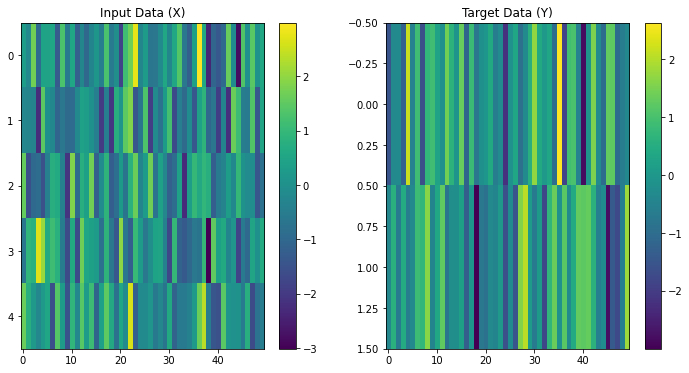

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Input Data (X)")
plt.imshow(X, aspect='auto', cmap='viridis')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title("Target Data (Y)")
plt.imshow(Y, aspect='auto', cmap='viridis')
plt.colorbar()
plt.show()

## Forward Pass

In [17]:
# Layer 1 computation
layer1_output = torch.mm(W1, X)
relu_layer1 = relu(layer1_output)

# Layer 2 computation
layer2_output = torch.mm(W2, relu_layer1)
relu_layer2 = relu(layer2_output)

# Layer 3 computation
layer3_output = torch.mm(W3, relu_layer2)

# Loss computation
residual = Y - layer3_output
loss = 0.5 * torch.norm(residual)**2

## Layer Outputs Visualization

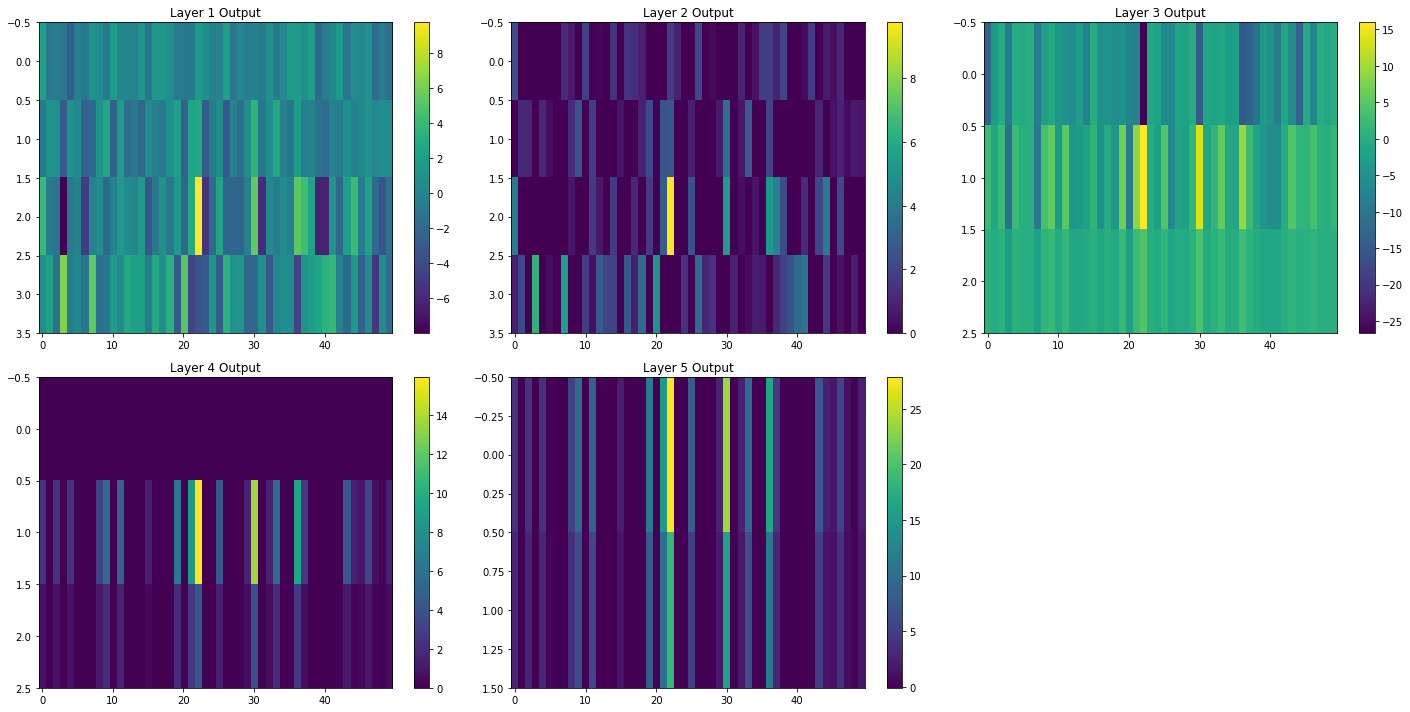

In [18]:
# Visualize Layer Outputs
layer_outputs = [layer1_output, relu_layer1, layer2_output, relu_layer2, layer3_output]

plt.figure(figsize=(20, 10))
for i, output in enumerate(layer_outputs, 1):
    plt.subplot(2, 3, i)
    plt.title(f"Layer {i} Output")
    plt.imshow(output.detach().numpy(), aspect='auto', cmap='viridis')
    plt.colorbar()
plt.tight_layout()
plt.show()

## Manual Backward Pass

In [19]:
# Initialize the gradient of the loss w.r.t itself as 1
loss_gradient = 1

# The gradient of the residual is just the residual itself
residual_gradient = residual

# Compute the gradients of the output layers and backpropagate through the network
layer3_output_gradient = -residual_gradient
relu_layer2_gradient = W3.T @ layer3_output_gradient
layer2_output_gradient = relu_layer2_gradient * (layer2_output > 0).float()
relu_layer1_gradient = torch.mm(W2.T, layer2_output_gradient)
layer1_output_gradient = relu_layer1_gradient * (layer1_output > 0).float()

# Compute the gradients of the weights
W3_gradient = torch.mm(layer3_output_gradient, relu_layer2.T)
W2_gradient = torch.mm(layer2_output_gradient, relu_layer1.T)
W1_gradient = torch.mm(layer1_output_gradient, X.T)

# Compute the gradient of the input X
X_gradient = torch.mm(W1.T, layer1_output_gradient)

## Autograd Backward Pass

In [20]:
loss.backward()

# Get the gradient values from autograd
W1_autograd = W1.grad
W2_autograd = W2.grad
W3_autograd = W3.grad

## Gradient Verification

In [21]:
assert torch.allclose(W1_autograd, W1_gradient, atol=1e-4), "Gradients for W1 do not match!"
assert torch.allclose(W2_autograd, W2_gradient, atol=1e-4), "Gradients for W2 do not match!"
assert torch.allclose(W3_autograd, W3_gradient, atol=1e-4), "Gradients for W3 do not match!"

In [22]:
## Visualize Gradients

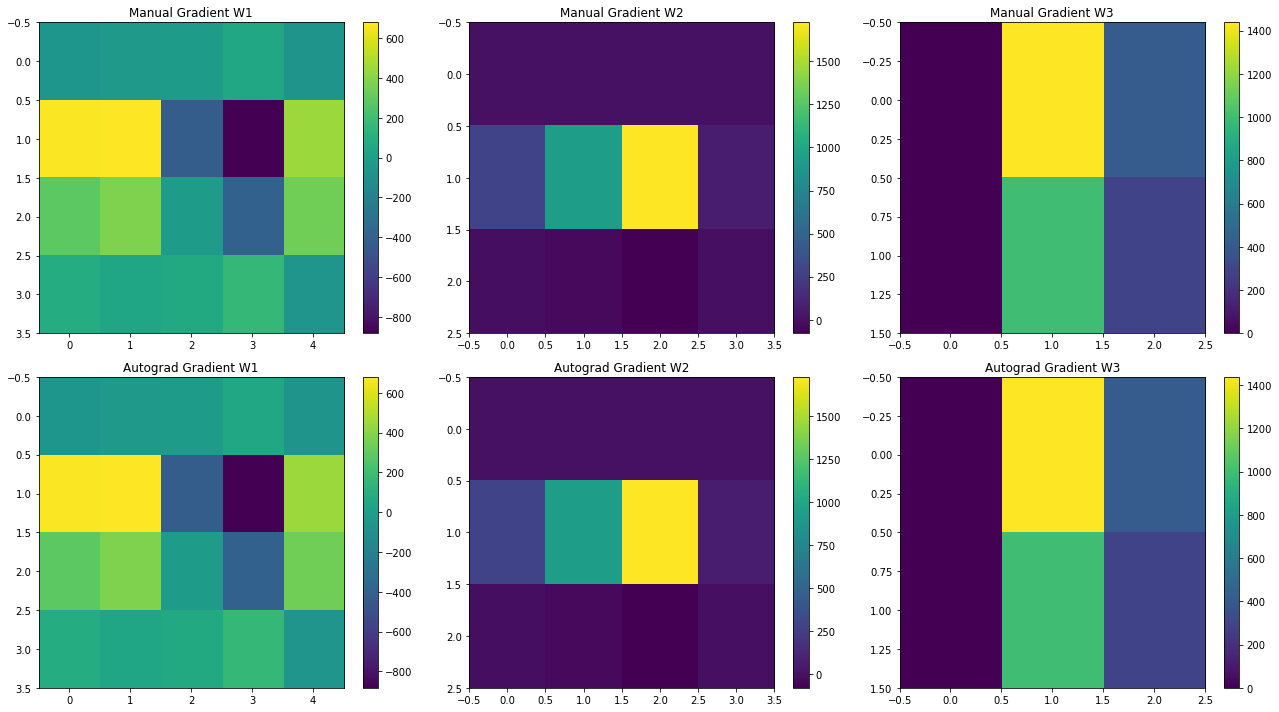

In [23]:
manual_gradients = [W1_gradient, W2_gradient, W3_gradient]
autograd_gradients = [W1_autograd, W2_autograd, W3_autograd]

plt.figure(figsize=(18, 10))
for i, (manual_grad, auto_grad) in enumerate(zip(manual_gradients, autograd_gradients), 1):
    plt.subplot(2, 3, i)
    plt.title(f"Manual Gradient W{i}")
    plt.imshow(manual_grad.detach().numpy(), aspect='auto', cmap='viridis')
    plt.colorbar()
    
    plt.subplot(2, 3, i+3)
    plt.title(f"Autograd Gradient W{i}")
    plt.imshow(auto_grad.detach().numpy(), aspect='auto', cmap='viridis')
    plt.colorbar()
plt.tight_layout()
plt.show()